<a href="https://colab.research.google.com/github/Aditya8215/Deep-Learning-Practice/blob/main/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [29]:
x,y=make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

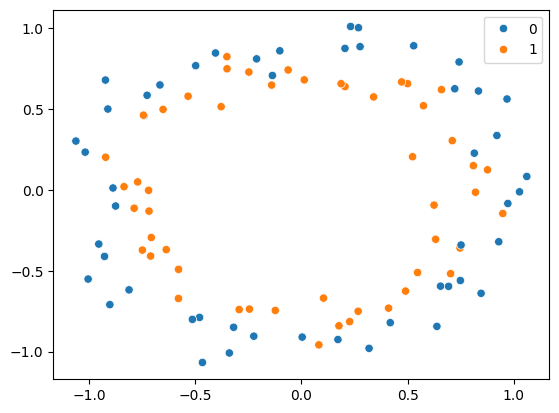

In [30]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [41]:
model=Sequential([
    Dense(256,input_dim=2,activation='relu'),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [42]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
)

In [46]:
history=model.fit(x_train,y_train,epochs=2500,validation_data=(x_test,y_test),callbacks=callback)

Epoch 1/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4750 - loss: 0.6903 - val_accuracy: 0.4500 - val_loss: 0.6997
Epoch 2/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5539 - loss: 0.6867 - val_accuracy: 0.4500 - val_loss: 0.7002
Epoch 3/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5602 - loss: 0.6840 - val_accuracy: 0.4500 - val_loss: 0.7012
Epoch 4/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5484 - loss: 0.6867 - val_accuracy: 0.4500 - val_loss: 0.7014
Epoch 5/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5211 - loss: 0.6861 - val_accuracy: 0.4500 - val_loss: 0.7030
Epoch 6/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5664 - loss: 0.6828 - val_accuracy: 0.4500 - val_loss: 0.7051
Epoch 7/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5422 - loss: 0.6793 - val_accuracy: 0.4500 - val_loss: 0.7093
Epoch 8/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5344 - loss: 0.6783 - val_accuracy: 0.4000 - v

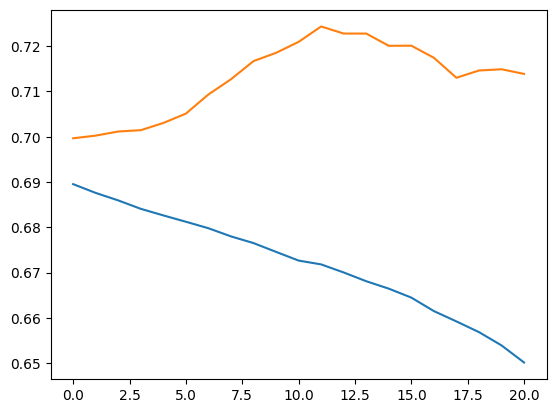

In [47]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')